## From this notebook, we are going to build forcasting models to predict sale price.

In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('../data/sales.csv')
df = pd.read_csv('sales.csv')

In [3]:
df.dropna(subset=['price'], inplace=True)

In [4]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


# 1. Data Split

<font color='red'>Assignment:</font> Split the DataFrame into two parts. One contains the sales happened before 2015. The other contains the sales happened not earlier than 2015. Name these two parts **train_raw** and **test_raw**, respectively.

In [5]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [6]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,2008-12-19,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,1997-09-10,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,2001-09-05,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,2016-12-23,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,2000-01-12,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [7]:
train_raw = df[df['purchase_date'] < '2015-01-01']

In [8]:
len(train_raw)

2757

In [9]:
test_raw = df[df['purchase_date'] >= '2015-01-01']

In [10]:
len(test_raw)

429

<font color='red'>Question:</font> Why do we want to split data in this way?

## Since the goal is to forcast future price, we aim at using past sales (the older sales) to predict the future sales (the more recent sales). ???

# 2. Generate Targets

<font color='red'>Assignment:</font> Transform the **price** columns in **train_raw** and **test_raw** into two numerical series. Name them as **y_train** and **y_test**.

In [12]:
y_train = train_raw.price.map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))

In [13]:
y_test = test_raw.price.map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))

In [14]:
train_raw

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,2008-12-19,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,1997-09-10,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,2001-09-05,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
4,$97k,"$122,659",2 Ton 970 Kg,2000-01-12,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm
5,$59k,"$60,320",2 Ton 930 Kg,2011-08-19,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71 meters,96 cm,25 cm
...,...,...,...,...,...,...,...,...,...,...,...
3190,$254k,"$255,179",3 Ton 40 Kg,2012-04-20,D,intermediate,M14261,"IN732220,IN732456,IN733681,IN732831,IN733123,I...",2.02 meters,113 cm,30 cm
3191,$91k,"$144,631",2 Ton 890 Kg,2002-07-12,D,advanced,M14904,"IN732503,IN732583,IN732373,IN732338,IN732347,I...",2.52 meters,99 cm,26 cm
3193,NaN,"$40,384",2 Ton 830 Kg,2007-05-25,"J,B",intermediate,M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",2.15 meters,106 cm,28 cm
3195,$44k,"$55,931",2 Ton 950 Kg,2002-04-12,R,advanced,M14341,IN732587,2.52 meters,100 cm,26 cm


## <font color='blue'>Question: Why do we use series all the time instead of modifying the dataframe directly?</font>

# 3. Simplest Models

## 3.1 Random Guess Model

### 3.1.1 Model Building

**Example:** Class for random guess model.

In [17]:
import numpy as np

class random_guess(object):
    """
    This class provides random values between the minimum and maximum 
    of y_train as predictions.
    """
    
    def fit(self, y_train):
        self.y_min = min(y_train)
        self.y_max = max(y_train)
        
    def predict(self, y_test):
        length = len(y_test)
        return np.random.uniform(self.y_min, self.y_max, length)

**Example:** Initialize model

In [ ]:
model = random_guess() # creat an instance/object of the random_guess class

**Example:** Train the model using **y_train**

In [ ]:
model.fit(y_train)

### 3.1.2 Training Loss

**Example:** Make prediction using the **training data**

In [ ]:
y_train_pred = model.predict(y_train)

**Example:** Visualize the difference between predictions and ground truth

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

Text(0, 0.5, 'y_train_pred')

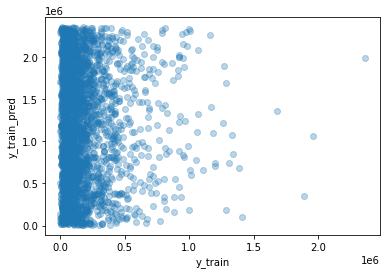

In [ ]:
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

**Example:** Calculate the **training loss**

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.02e+06
train MSE: 1.49e+12
train R2: -33.876


<font color='red'>Question:</font> What is a metric?

### A measure for quantitatively comparing or assessing

<font color='red'>Question:</font> How these metrics are calculated? What do they measure?

### Mean absolute error (MAE) is a measure of difference between two variables. -- MAE robust to outliers 
### $ MAE = \frac{\sum_{i = 1}^{n} |y_i - \hat{y}_i|}{n} $

### Mean squared error (MSE) measures the average of the squares of the errors. It's good to use MSE if the data has a lot of outliers. The square will emphasize on the outlier errors. -- MSE to check outliers
### $ MSE = \frac{\sum_{i = 1}^{n} |y_i - \hat{y}_i|^2}{n} $

### R squared represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It does not take into consideration any biases that might be present in the data. Sometimes a good model might have a low R squared value while a not so great model can have a high R squared value.
### $ R^2 = 1 - \frac{\sum_{i = 1}^{n}(y_{i} - \hat{y}_{i})^{2}}{\sum_{i = 1}^{n}(y_{i} - mean(y_{i}))^{2}} $

1. https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4
2. https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

##### <font color='red'>Question:</font> what's the range of R2?

### 3.1.3 Test loss

**Example:** Make prediction using the **test data**

In [ ]:
y_pred_test = model.predict(y_test)

<font color='red'>Assignment:</font> Visualize the difference between predictions and ground truth.

Text(0, 0.5, 'y_pred_test')

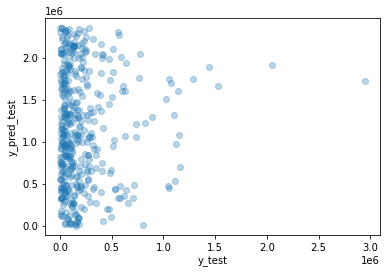

In [ ]:
plt.scatter(y_test, y_pred_test, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')

<font color='red'>Assignment:</font> Calculate the test loss.

In [ ]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_pred_test)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_pred_test)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_pred_test)))

test MAE: 9.92e+05
test MSE: 1.41e+12
test R2: -15.352


### This model clearly is not great.

## 3.2 Mean Model

### <font color = 'blue'>Need help with Class</font>

<font color='red'>Assignment:</font> Build a class providing the mean of **y_train** as predictions.

In [ ]:
import numpy as np

class mean_predict(object):
    """
    This class provides the mean of y_train as predictions.
    """
    
#     def fit(self, y_train):
#         self.y_mean = sum(y_train)/len(y_train)
        
#     def predict(self, y_test):
#         length = len(y_test)
#         return self.y_mean*np.ones(length)
    
    def fit(self, y_train):
        y_train_valid = y_train.dropna() # NaN has been dropped already
        self.y_mean = np.mean(y_train_valid)
        
    def predict(self,y_test):
        n = len(y_test)
        return [self.y_mean]*n

<font color='red'>Assignment:</font> Train a model, make prediction, visulize the comparision between prediction and ground truth, and calculate train/test loss.

In [ ]:
model_mean = mean_predict() 

NameError: ignored

### <font color='red'>Fit on train data, never on test data</font>

In [ ]:
model_mean.fit(y_train)

In [ ]:
# model_mean.y_mean

### <font color='red'>Predict on test data</font>

In [ ]:
y_mean_pred = model_mean.predict(y_test)

Text(0, 0.5, 'y_mean_pred')

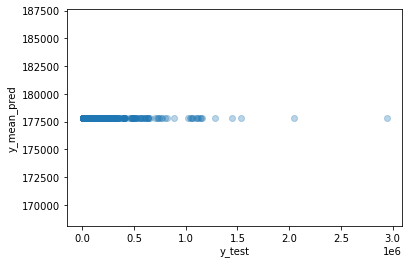

In [ ]:
plt.scatter(y_test, y_mean_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_mean_pred')

In [ ]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_mean_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_mean_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_mean_pred))) # test R2 should not be 0

test MAE: 1.70e+05
test MSE: 8.73e+10
test R2: -0.013


##### 1. calculate test loss !
### 2. <font color='red'>only fit train data !!!</font> test data is supposed to be unknown, only operation on test data is predict, otherwise there will be data leakage 

<font color='red'>Question:</font> Is the mean-value model better than random guess?

### This is still a pretty bad model. I think the two models are both terrible, although from the errors and R squared value, it seems to be improving.

##### <font color='red'>One more example on class</font>

In [11]:
class mean_guess(object):
    """
    This class provides mean values of y_train as predictions.
    
    """
    
    def fit(self, y_train):
        self.y_train_mean = [np.mean(y_train)]*len(y_train)
        
    def predict(self, y_test):
        self.test=[np.mean(y_train)]*len(y_test)
        return self.test

In [15]:
model = mean_guess()

In [18]:
model.fit(y_train)

In [19]:
y_train_pred=model.predict(y_train)

In [22]:
r2_score(y_train, y_train_pred)

0.0

In [23]:
y_test_pred=model.predict(y_test)

In [24]:
r2_score(y_test, y_test_pred)

-0.012704870440639171